x.shape=  (569, 30)
y.shape=  (569,)
x_train.shape =  (426, 30)
x_test.shape=  (143, 30)
y_train.shape=  (426,)
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target name: {0: 'malignant', 1: 'benign'}

train accuracy= 95.775%
test accuracy= 91.608%

n_estimators= 5, max_features= 1, accuracy_train = 99.531%, accuracy_test = 95.105%

n_estimators= 5, max_features= 2, accuracy_train = 99.296%, accuracy_test = 93.706%

n_estimators= 5, max_features= 3, accuracy_train = 99.531%, a

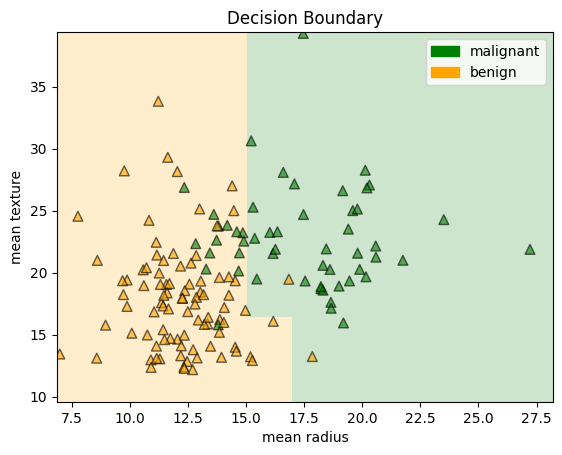

C:\Users\Oleg\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:04:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Oleg\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:04:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost training accuracy: 1.00
XGBoost test accuracy: 0.95


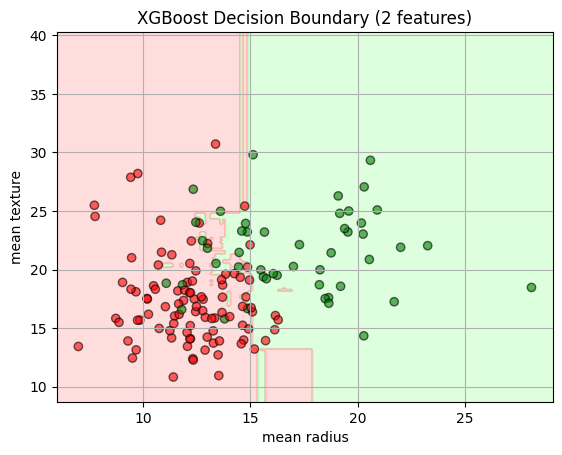

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
import os
from xgboost import XGBClassifier


class DSN_Trees:
    def __init__(self):
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.clf = None
        self.features = None

    def load_data(self):
        data = load_breast_cancer()
        x, y, self.features, labels = data.data, data.target, data.feature_names, data.target_names

        print('x.shape= ', x.shape)
        print('y.shape= ', y.shape)
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)
        print('x_train.shape = ', x_train.shape)
        print('x_test.shape= ', x_test.shape)
        print('y_train.shape= ', y_train.shape)
        print('features:', self.features)
        dict_names = {i: v for i, v in enumerate(labels)}
        print('target name:', dict_names)

        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def lrn(self):
        max_depth = 3
        self.clf = DecisionTreeClassifier(
            criterion='entropy',
            random_state=20,
            max_depth=max_depth,
        ).fit(self.x_train, self.y_train)

        print("\ntrain accuracy= {:.3%}".format(self.clf.score(self.x_train, self.y_train)))
        print("test accuracy= {:.3%}".format(self.clf.score(self.x_test, self.y_test)))

    def dsn_viz(self):
        graph_viz = tree.export_graphviz(self.clf, out_file=None, feature_names=self.features)
        graph = graphviz.Source(graph_viz)
        graph.view(cleanup=True)


class RND_Forests:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.clf_rnd = None

    def lrn_rnd(self):
        self.n_esms_lst = [5, 10, 20]
        max_features_list = list(np.arange(1, self.x_train.shape[1] + 1))

        for n_estimators in self.n_esms_lst:
            for max_features in max_features_list:
                self.clf_rnd = RandomForestClassifier(
                    random_state=10,
                    n_estimators=n_estimators,
                    max_features=max_features,
                ).fit(self.x_train, self.y_train)

                accuracy_train = self.clf_rnd.score(self.x_train, self.y_train)
                accuracy_test = self.clf_rnd.score(self.x_test, self.y_test)

                print(f'\nn_estimators= {n_estimators}, max_features= {max_features}, '
                      f'accuracy_train = {accuracy_train:.3%}, accuracy_test = {accuracy_test:.3%}')

        print('\nComparing to Decision Tree Classifier')
        max_depth = 3
        self.clf_rnd = DecisionTreeClassifier(
            criterion='entropy',
            random_state=20,
            max_depth=max_depth,
        ).fit(self.x_train, self.y_train)

        print("train accuracy = {:.3%}".format(self.clf_rnd.score(self.x_train, self.y_train)))
        print("test accuracy = {:.3%}".format(self.clf_rnd.score(self.x_test, self.y_test)))




class GBDT:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.clf = None
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def plt_dec_un(self, precision=0.05, plot_symbol_size=50, ax=None, is_exded=True, labels=None, features=None,
                   title="Decision Boundary"):
        from sklearn.datasets import load_breast_cancer

        data = load_breast_cancer()
        x = data.data
        y = data.target

        features = ['mean radius', 'mean texture']
        feature_indices = [list(data.feature_names).index(f) for f in features]

        x = x[:, feature_indices]

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)

        self.clf = DecisionTreeClassifier(criterion='entropy', random_state=20, max_depth=3)
        self.clf.fit(x_train, y_train)

        colors_area = colors_for_points = np.array(['green', 'orange'])
        cmap_light = ListedColormap(colors_area)

        x1_min, x1_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
        x2_min, x2_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, precision),
                               np.arange(x2_min, x2_max, precision))
        target_samp_grd = np.c_[xx1.ravel(), xx2.ravel()]
        r = self.clf.predict(target_samp_grd).reshape(xx1.shape)

        if ax:
            plt.sca(ax)

        plt.pcolormesh(xx1, xx2, r, cmap=cmap_light, alpha=0.2)

        plt.scatter(x_test[:, 0], x_test[:, 1], marker='^', s=plot_symbol_size,
                    c=colors_for_points[y_test.ravel()], edgecolor='black', alpha=0.6)

        patches = [mpatches.Patch(color=colors_for_points[i], label=data.target_names[i]) for i in range(2)]
        plt.legend(handles=patches)

        plt.xlabel(features[0])
        plt.ylabel(features[1])
        plt.title(title)
        plt.show()

class XGBoostModel:
    def __init__(self, x_train, y_train, x_test, y_test, feature_names):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.feature_names = feature_names
        self.clf_xgb = None

    def train(self):
        self.clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        self.clf_xgb.fit(self.x_train, self.y_train)

        print('\nXGBoost training accuracy: {:.2f}'.format(self.clf_xgb.score(self.x_train, self.y_train)))
        print('XGBoost test accuracy: {:.2f}'.format(self.clf_xgb.score(self.x_test, self.y_test)))

    def plot_decision_boundary(self, features_to_use=['mean radius', 'mean texture']):
        # Визначаємо індекси потрібних фіч
        feature_indices = [list(self.feature_names).index(f) for f in features_to_use]

        
        x = np.vstack((self.x_train, self.x_test))
        y = np.hstack((self.y_train, self.y_test))
        x_vis = x[:, feature_indices]

        
        X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(x_vis, y, random_state=0)

        # Перенавчання моделі для 2D візуалізації
        model_vis = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model_vis.fit(X_train_vis, y_train_vis)

        # Побудова сітки
        x_min, x_max = x_vis[:, 0].min() - 1, x_vis[:, 0].max() + 1
        y_min, y_max = x_vis[:, 1].min() - 1, x_vis[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        
        cmap_light = ListedColormap(['#AAFFAA', '#FFAAAA'])
        plt.figure()
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
        plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, cmap=ListedColormap(['green', 'red']),
                    edgecolors='k', marker='o', alpha=0.6)
        plt.xlabel(features_to_use[0])
        plt.ylabel(features_to_use[1])
        plt.title("XGBoost Decision Boundary (2 features)")
        plt.grid(True)
        plt.show()


                



tree_model = DSN_Trees()
tree_model.load_data()
tree_model.lrn()
tree_model.dsn_viz()


tree_model_rnd = RND_Forests(tree_model.x_train, tree_model.y_train, tree_model.x_test, tree_model.y_test)
tree_model_rnd.lrn_rnd()


model_gbdt = GBDT(tree_model.x_train, tree_model.y_train, tree_model.x_test, tree_model.y_test)
model_gbdt.plt_dec_un()

xgb_model = XGBoostModel(tree_model.x_train, tree_model.y_train, tree_model.x_test, tree_model.y_test, tree_model.features)
xgb_model.train()
xgb_model.plot_decision_boundary()